## Creating a Spectrogram

### Import modules

In [1]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Set up the graphs to make it look nice.

In [2]:
sns.set() # Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 100 # Show nicely large images in this notebook

### Load the sound.  
If this happens correctly, nothing will happen.

In [3]:
sound = parselmouth.Sound("03-01-01-01-01-01-01.wav")

## Plotting a Spectrogram

- Pre-emphisize the sound
    - If you recall, the frequencies in the human voice get softer the higher in frequency we go.  Pre-emphisizing the sound undoes some of this to make it easier to see the higher frequencies on the spectrogram

In [4]:
sound.pre_emphasize()

Create a spectrogram object.  We can adjust two parameters:  

- Window length
    - How much time will we analyze each step across the sound
- Maximum Frequency
    - What is the highest frequency we want to plot
    - We are going to use 5500, which should capture the relevant frequencies for most adult voices.

In [5]:
spectrogram = sound.to_spectrogram(window_length=0.05, 
                                   maximum_frequency=5500)

Get the X and Y data from the spectrogram object.  

- X is time and Y is frequency

In [6]:
X, Y = spectrogram.x_grid(), spectrogram.y_grid()

Check if those data are correct type

Remember that a spectrogram is a 3D plot.  We are plotting the frequencies over time, and representing how loud each frequency is by colour.  

To get our z-axis values (amplitude), we must convert pascals into decibels (dB)

In [7]:
sg_db = 10 * np.log10(spectrogram.values)

Set the dynamic range.  The dynamic range is the range of z-axis values we will use.  In other words, it is the limit of how loud and soft our amplitude values can be in order to draw them on the plot. 

In [8]:
dynamic_range=70

Text(0, 0.5, 'frequency [Hz]')

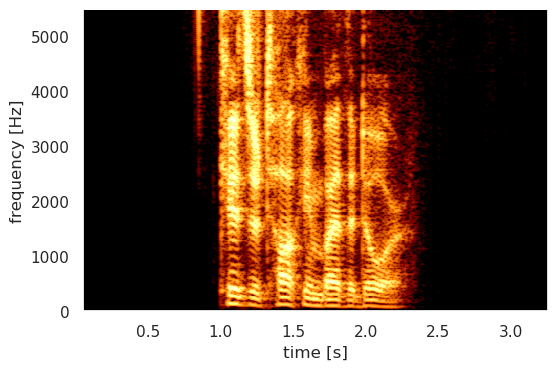

In [9]:
plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
plt.ylim([spectrogram.ymin, spectrogram.ymax])
plt.xlabel("time [s]")
plt.ylabel("frequency [Hz]")

## Let's turn that into a function so we can reuse the code

- Define the function
    - The funtion's name is <code>draw_spectrogram</code>
    - We give the function some data.
        - The spectrogram object that we'll create later
        - The dynamic range (see below)


### Spectrogram function

In [10]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

### Colour choices

In Python we can choose lots of colour schemes.  If you want to try lots of colours, you can alter the line:  

<code>    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')</code>  


Instead of <code>'afmhot'</code>, try anything in the list below....


'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'

If we did that right, nothing should happen when we execute the cells

### Window length

- window length specifies how big of a window to use.
- To see vertical lines (glottal pulses) and better formants, use 0.01
- To see horizontal lines (harmonics), use 0.05

In [11]:
sound.pre_emphasize()
spectrogram = sound.to_spectrogram(window_length=0.01, maximum_frequency=5500)

### Narrow Band Spectrogram

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


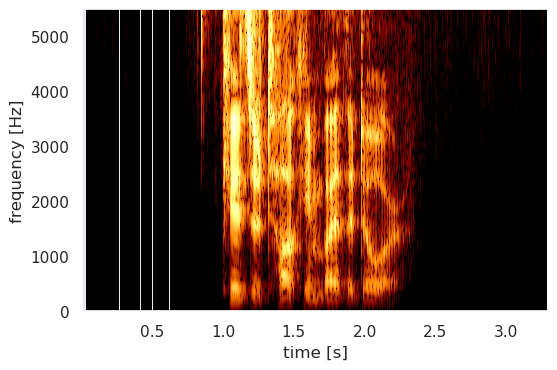

In [12]:
plt.figure()
draw_spectrogram(spectrogram)
plt.show()

### Wide band spectrogram

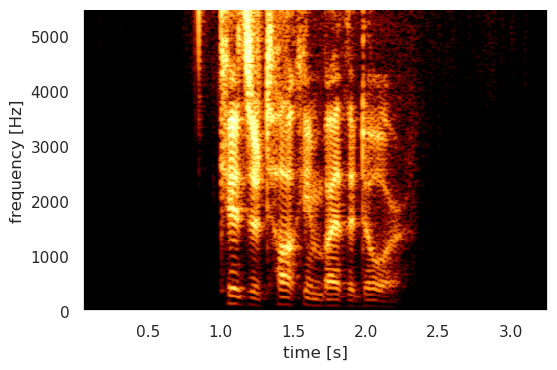

In [13]:
spectrogram = sound.to_spectrogram(window_length=0.05, maximum_frequency=5500)
plt.figure()
draw_spectrogram(spectrogram)
plt.show()

### Dynamic Range

Lowering the dynamic range will make the softer parts of the sound disappear from the spectrogram.  This can be useful to highlight different parts of the sound, or if there is a lot of background noise.

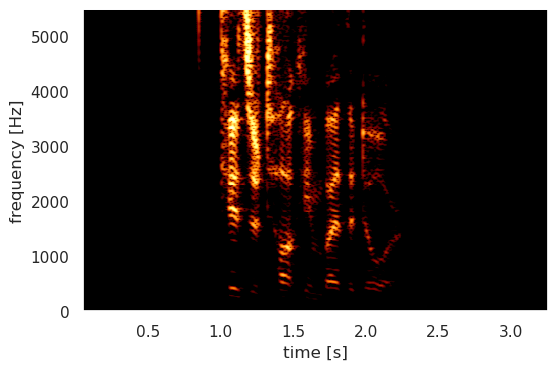

In [14]:
spectrogram = sound.to_spectrogram(window_length=0.05, maximum_frequency=5500)
plt.figure()
draw_spectrogram(spectrogram, dynamic_range=40)
plt.show()

### Maximum frequency
Raising the maximum frequency shows more of the sound.  We don't really need to do this because adult human voices normally don't go above 5500 Hz (5.5 kHz), but let's see what happens anyways.  Here we'll raise maximum frequency to 220500 Hz (2.205 kHz) which is the highest frequency captured at a 44.1 kHz sampling rate.

In [15]:
441000 / 2

220500.0

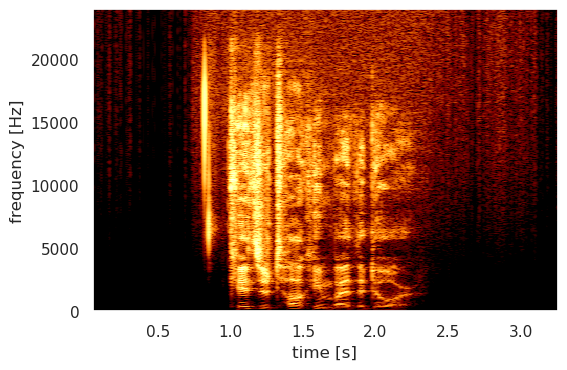

In [16]:
spectrogram = sound.to_spectrogram(window_length=0.05, 
                                   maximum_frequency=220500)
plt.figure()
draw_spectrogram(spectrogram, dynamic_range=70)
plt.show()

Now we can see the full sound, but you can see two important things:  
1) Most of the sound information is contained below 5500 Hz  
2) As we go up in frequency, we go down in amplitude


## Spectrogram Colours

We can make a loop to produce a spectrogram in each of the colours.  First we need to make `cmap` into a variable that is passed into our function.

In [17]:
def draw_spectrogram(spectrogram, dynamic_range=70, cmap='afmhot'):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap=cmap)
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

In [18]:
colours = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 
 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 
 'hot', 'afmhot', 'gist_heat', 'copper']

In [19]:
spectrogram = sound.to_spectrogram(window_length=0.05, maximum_frequency=5500)

binary


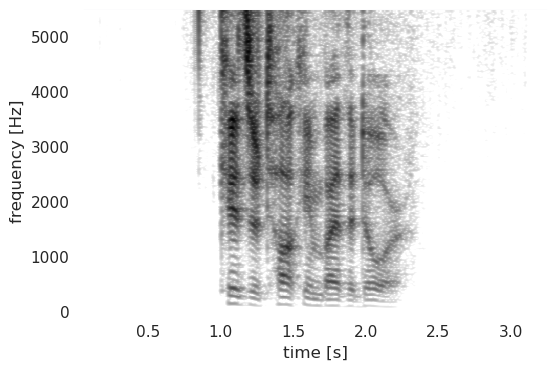

gist_yarg


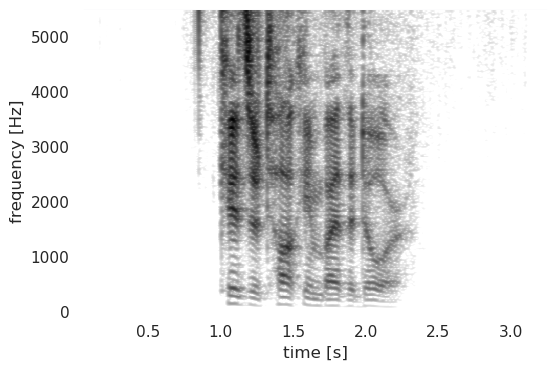

gist_gray


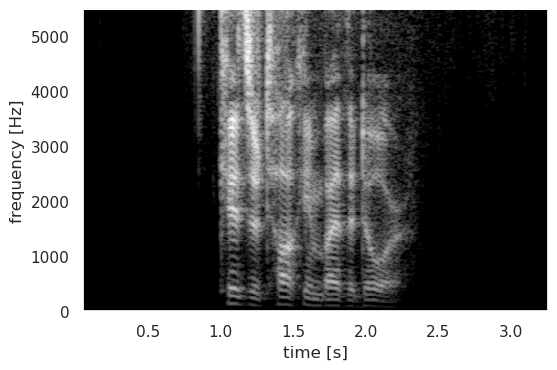

gray


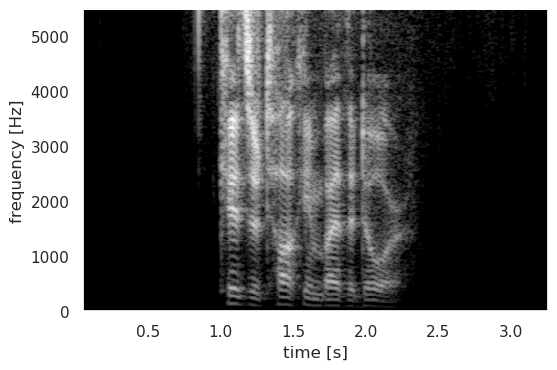

bone


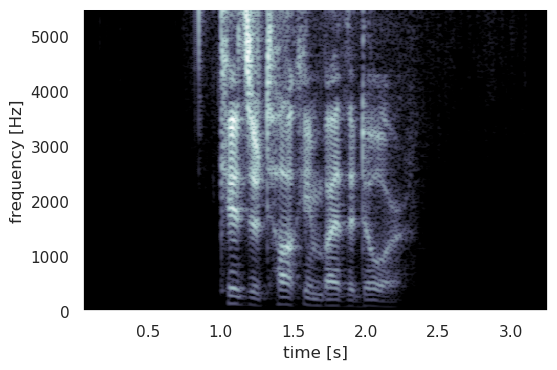

pink


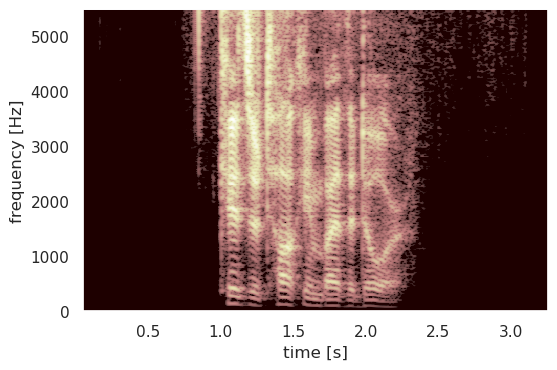

spring


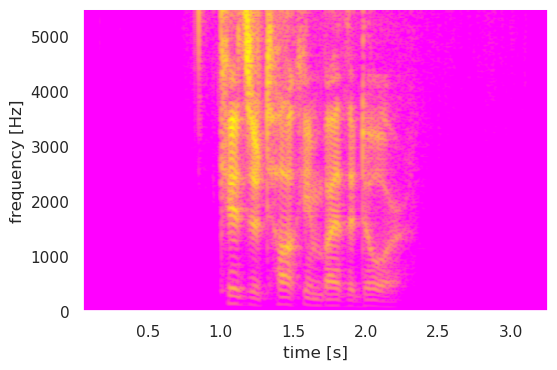

summer


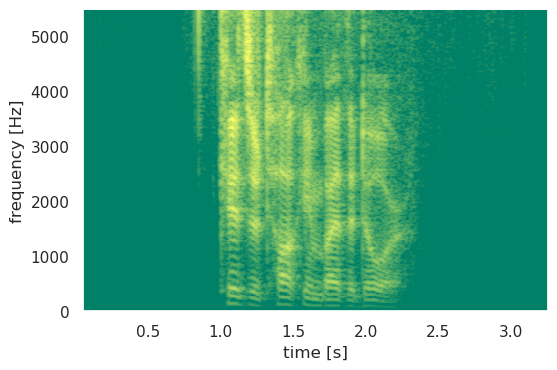

autumn


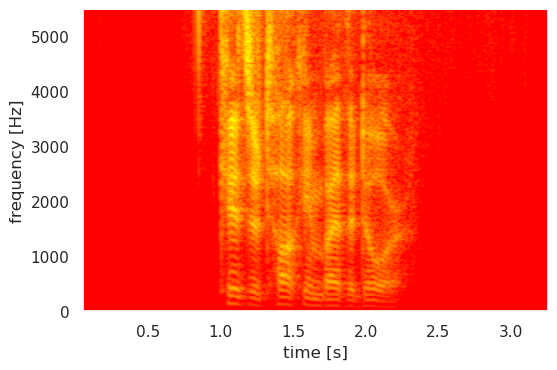

winter


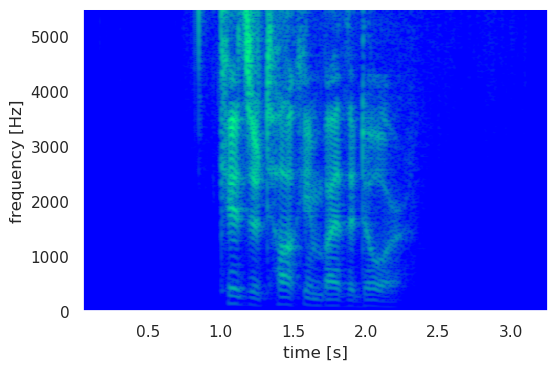

cool


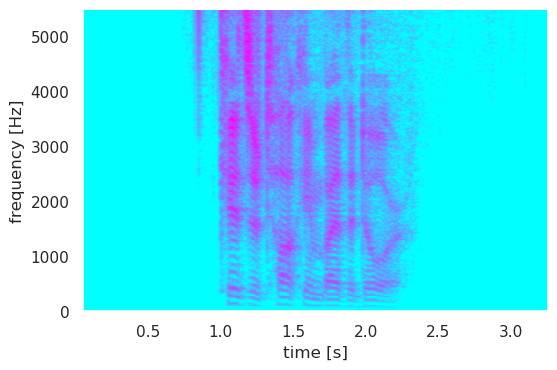

Wistia


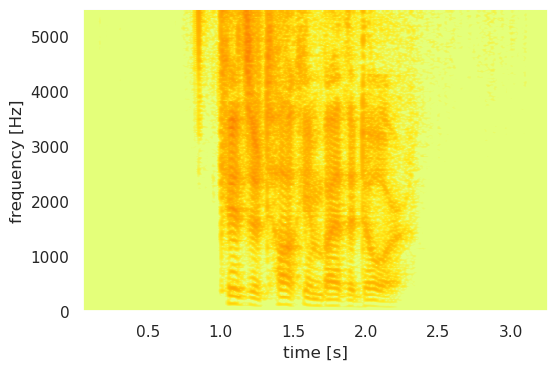

hot


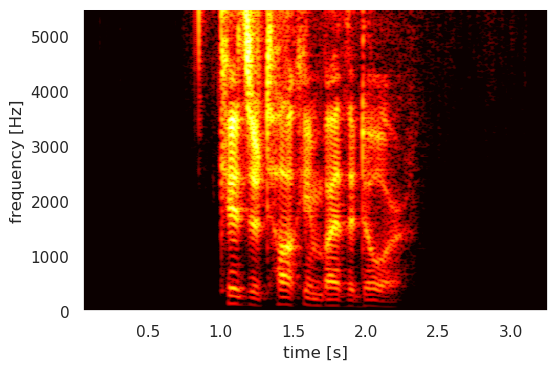

afmhot


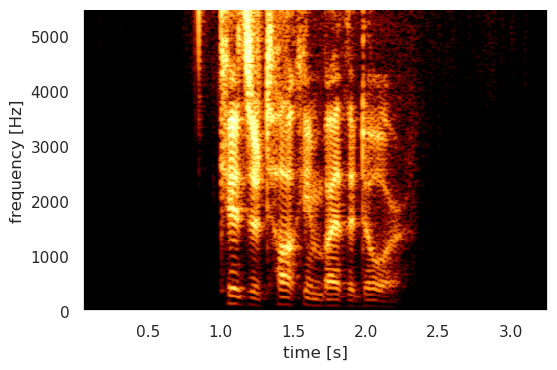

gist_heat


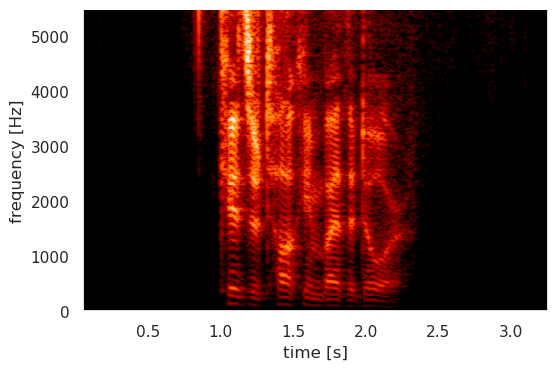

copper


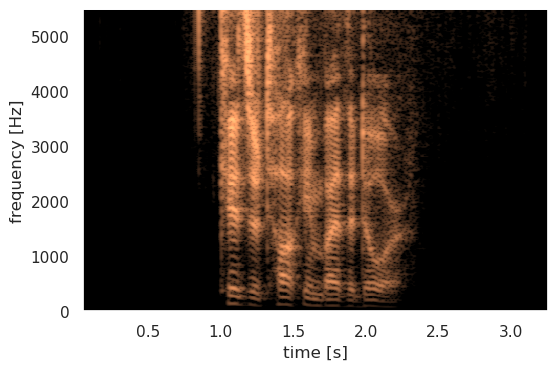

In [20]:
for colour in colours:
    print(colour)
    draw_spectrogram(spectrogram, dynamic_range=70, cmap=colour)
    plt.show()